<a href="https://colab.research.google.com/github/MahmudGalib7/AI-Olympiad/blob/master/machine_learning/computer_vision/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
!pip3 install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [5]:
columns = train.columns.to_list()
columns[0] = 'label'
train.columns = columns
test.columns = columns

In [6]:
X_train = train.drop("label", axis=1).values
y_train = train['label'].values

In [7]:
X_test = test.drop('label',  axis=1).values
y_test = test['label'].values

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

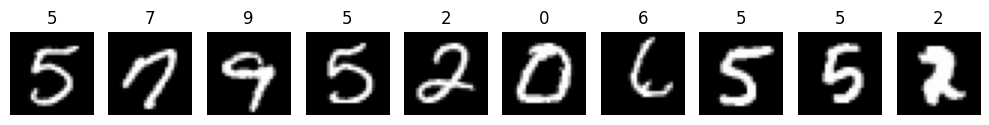

In [10]:
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"{y_train[i]}")
  plt.axis('off')
plt.tight_layout()

In [11]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
X_train_splt, X_val, y_train_splt, y_val = train_test_split(X_train, y_train_cat, test_size=0.2, random_state=42)

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
    X_train_splt, y_train_splt,epochs=5, validation_data=(X_val, y_val),batch_size=64
)

val_loss, val_acc = model.evaluate(X_val, y_val)
print(f" Validation Accuracy: {val_acc:.4f}")

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.9766 - loss: 0.0735 - val_accuracy: 0.9855 - val_loss: 0.0453
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9835 - loss: 0.0540 - val_accuracy: 0.9833 - val_loss: 0.0465
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9837 - val_loss: 0.0464
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.9869 - loss: 0.0408 - val_accuracy: 0.9843 - val_loss: 0.0445
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9886 - loss: 0.0357 - val_accuracy: 0.9862 - val_loss: 0.0476
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9873 - loss: 0.0412
 Validation Accuracy: 0.9862


In [16]:
model.save('NMIST_CNN_MODEL.h5')

In [23]:
y_prediction = model.predict(X_test[:10])
y_predicted_label = y_prediction.argmax(axis=1)
y_true = y_test.argmax()
wrong_pred = np.where(y_predicted_label != y_true)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


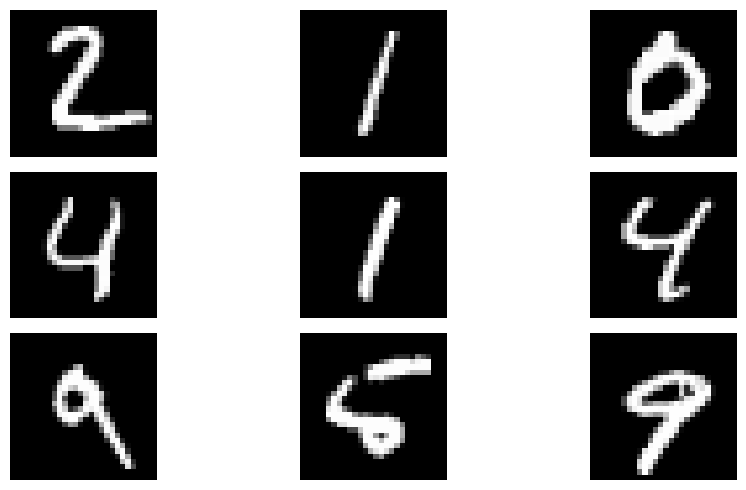

In [26]:
plt.figure(figsize=(10, 5))
for i in range(9):
  idx = wrong_pred[i]
  plt.subplot(3, 3, i+1)
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
  # plt.title(f"y_true: {y_true[idx]} y_prediction: {y_predicted_label[idx]}")
  plt.axis('off')
plt.tight_layout()